In [1]:
import keras
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3

dog_generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(dog_generator_input)
x = layers.LeakyReLU()(x)                       
x = layers.Reshape((16, 16, 128))(x)            

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)     
x = layers.LeakyReLU()(x)                                            

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x) 
dog_generator = keras.models.Model(dog_generator_input, x)                   
dog_generator.summary()                                                  

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

In [2]:
bird_generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(bird_generator_input)
x = layers.LeakyReLU()(x)                       
x = layers.Reshape((16, 16, 128))(x)            

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)     
x = layers.LeakyReLU()(x)                                            

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x) 
bird_generator = keras.models.Model(bird_generator_input, x)                   
bird_generator.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

In [3]:
def layer_shape(w):
    for arr in w:
        print(arr.shape)

In [4]:
def weight_cross(com,dog,bird):
    """
    dog_w = dog_generator.get_weights()
    bird_w = bird_generator.get_weights()
    com_w = composite_generator.get_weights()
    """
    result = []
    count = 2
    switch = 0
    result.extend(com[0:2])
    while count<=len(dog)-3:
        if switch%2== 0:
            result.extend(dog[count:count+2])
            count+=2
            switch+=1
        else:
            result.extend(bird[count:count+2])
            count+=2
            switch+=1
    result.extend(com[-2:])
    return result

In [5]:
composite_generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(composite_generator_input)
x = layers.LeakyReLU()(x)                       
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)     
x = layers.LeakyReLU()(x)                                            

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x) 
composite_generator = keras.models.Model(composite_generator_input, x)                   
composite_generator.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32768)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

In [6]:
dog_discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(dog_discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)                                      

#x = layers.Dense(1, activation='sigmoid')(x)                    
x = layers.Dense(1, activation='linear')(x)

dog_discriminator = keras.models.Model(dog_discriminator_input, x)      
dog_discriminator.summary()

dog_discriminator_optimizer = keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,                                              
    decay=1e-8)                                                 
# dog_discriminator.compile(optimizer=dog_discriminator_optimizer, loss='binary_crossentropy')
dog_discriminator.compile(optimizer=dog_discriminator_optimizer, loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 6, 6, 128)         0         
__________

In [7]:
bird_discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(bird_discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)                                      

#x = layers.Dense(1, activation='sigmoid')(x)                    
x = layers.Dense(1, activation='linear')(x)                    

bird_discriminator = keras.models.Model(bird_discriminator_input, x)      
bird_discriminator.summary()

bird_discriminator_optimizer = keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,                                              
    decay=1e-8)                                                 
#bird_discriminator.compile(optimizer=bird_discriminator_optimizer, loss='binary_crossentropy')
bird_discriminator.compile(optimizer=bird_discriminator_optimizer, loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 6, 6, 128)         0         
__________

In [8]:
dog_discriminator.trainable = False                       

dog_gan_input = keras.Input(shape=(latent_dim,))
dog_gan_output = dog_discriminator(dog_generator(dog_gan_input))
dog_gan = keras.models.Model(dog_gan_input, dog_gan_output)

dog_gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
#dog_gan.compile(optimizer=dog_gan_optimizer, loss='binary_crossentropy')
dog_gan.compile(optimizer=dog_gan_optimizer, loss='mse')

In [9]:
bird_discriminator.trainable = False                       

bird_gan_input = keras.Input(shape=(latent_dim,))
bird_gan_output = bird_discriminator(bird_generator(bird_gan_input))
bird_gan = keras.models.Model(bird_gan_input, bird_gan_output)

bird_gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
#bird_gan.compile(optimizer=bird_gan_optimizer, loss='binary_crossentropy')
bird_gan.compile(optimizer=bird_gan_optimizer, loss='mse')

In [10]:
from keras import backend as K
bird_discriminator.trainable = False
dog_discriminator.trainable = False  

_iter = 0

composite_gan_input = keras.Input(shape=(latent_dim,))

composite_gen = composite_generator(composite_gan_input)

composite_gan_output_1 = dog_discriminator(composite_gen)
composite_gan_output_2 = bird_discriminator(composite_gen)
composite_gan = keras.models.Model(composite_gan_input, [composite_gan_output_1,composite_gan_output_2])

composite_gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
#composite_gan.compile(optimizer=composite_gan_optimizer, loss='binary_crossentropy', loss_weights=[1., 1.])
composite_gan.compile(optimizer=composite_gan_optimizer, loss='mse')

composite_gan.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
model_3 (Model)                 (None, 32, 32, 3)    6264579     input_8[0][0]                    
__________________________________________________________________________________________________
model_4 (Model)                 (None, 1)            790913      model_3[1][0]                    
__________________________________________________________________________________________________
model_5 (Model)                 (None, 1)            790913      model_3[1][0]                    
Total params: 7,846,405
Trainable params: 6,264,579
Non-trainable params: 1,581,826
_________________________

In [11]:
import os
from keras.preprocessing import image

(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data() 
#(x_train, y_train), (_, _) = keras.datasets.mnist.load_data() 

bird_x_train = x_train[y_train.flatten() == 3] # bird
dog_x_train = x_train[y_train.flatten() == 5] # dog

bird_x_train = bird_x_train.reshape(
    (bird_x_train.shape[0],) +                                       
    (height, width, channels)).astype('float32') / 255.         

dog_x_train = dog_x_train.reshape(
    (dog_x_train.shape[0],) +                                       
    (height, width, channels)).astype('float32') / 255.         

iterations = 10000
batch_size = 20
save_dir = 'composit_GAN/'        

In [12]:
dog_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
bird_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
composite_latent_vectors = K.concatenate([dog_random_latent_vectors,bird_random_latent_vectors],axis=1)

In [13]:
print(composite_latent_vectors)

Tensor("concat:0", shape=(20, 64), dtype=float64)


In [14]:
start = 0
for step in range(iterations):
    _iter+=1
    stop = start + batch_size               
    
    # dog_discr
    dog_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))        
    dog_generated_images = dog_generator.predict(dog_random_latent_vectors) 
    dog_real_images = dog_x_train[start: stop]                          
    dog_combined_images = np.concatenate([dog_generated_images, dog_real_images])      
    dog_labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])                   
    dog_labels += 0.05 * np.random.random(dog_labels.shape)                        

    dog_d_loss = dog_discriminator.train_on_batch(dog_combined_images, dog_labels)         

    # dog_gan
        
    dog_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))                   
    dog_misleading_targets = np.zeros((batch_size, 1))
    
    dog_a_loss = dog_gan.train_on_batch(dog_random_latent_vectors, dog_misleading_targets)                        

    # bird_discr
    bird_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))        
    bird_generated_images = bird_generator.predict(bird_random_latent_vectors) 
    bird_real_images = bird_x_train[start: stop]                          
    bird_combined_images = np.concatenate([bird_generated_images, bird_real_images])      
    bird_labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])                   
    bird_labels += 0.05 * np.random.random(bird_labels.shape)                        

    bird_d_loss = bird_discriminator.train_on_batch(bird_combined_images, bird_labels) 

    # bird_gan
    bird_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))                   
    bird_misleading_targets = np.zeros((batch_size, 1))
    
    bird_a_loss = bird_gan.train_on_batch(bird_random_latent_vectors, bird_misleading_targets) 
    
    
    # dogbird_gan
    """
    dog_w = dog_generator.get_weights()
    bird_w = bird_generator.get_weights()
    com_w = composite_generator.get_weights()
    
    composite_generator.set_weights(weight_cross(com_w,dog_w,bird_w))
    """
    composite_random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    composite_generated_images = composite_generator.predict(composite_random_latent_vectors)
    
    dog_combined_images = np.concatenate([composite_generated_images, dog_real_images])
    bird_combined_images = np.concatenate([composite_generated_images, bird_real_images])
    dog_labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    dog_labels += 0.05 * np.random.random(dog_labels.shape)
    
    dog_d_loss = dog_discriminator.train_on_batch(dog_combined_images, dog_labels)
    bird_d_loss = bird_discriminator.train_on_batch(bird_combined_images, dog_labels)
    
    #composite_random_latent_vectors =  np.concatenate(dog_random_latent_vectors,bird_random_latent_vectors)        
    composite_misleading_targets = np.zeros((batch_size, 1))
    
    composite_a_loss = composite_gan.train_on_batch(composite_random_latent_vectors, [composite_misleading_targets,composite_misleading_targets])
    
    start += batch_size
    if start > min([len(bird_x_train), len(dog_x_train)]) - batch_size:
        start = 0
    if step % 100 == 0:                                                    

        dog_gan.save_weights('dog_gan.h5')                                         
        bird_gan.save_weights('bird_gan.h5')                                         
        composite_gan.save_weights('composite_gan.h5')                                         

        print('dog_discriminator loss:', dog_d_loss)                               
        print('dog_adversarial loss:', dog_a_loss)                                 

        print('bird_discriminator loss:', bird_d_loss)                               
        print('bird_adversarial loss:', bird_a_loss)                                 

        print('composit_adversarial loss:', composite_a_loss)                                         

        dog_img = image.array_to_img(dog_generated_images[0] * 255., scale=False)  
        dog_img.save(os.path.join(save_dir, 'generated_dog' + str(step) + '.png'))              
        dog_img = image.array_to_img(dog_real_images[0] * 255., scale=False)       
        dog_img.save(os.path.join(save_dir, 'real_dog' + str(step) + '.png'))                   
        
        bird_img = image.array_to_img(bird_generated_images[0] * 255., scale=False)  
        bird_img.save(os.path.join(save_dir, 'generated_bird' + str(step) + '.png'))              
        bird_img = image.array_to_img(bird_real_images[0] * 255., scale=False)       
        bird_img.save(os.path.join(save_dir, 'real_bird' + str(step) + '.png'))                   
        
        composite_img = image.array_to_img(composite_generated_images[0] * 255., scale=False)  
        composite_img.save(os.path.join(save_dir, 'generated_composite' + str(step) + '.png'))              

C:\Users\Park chunyoung\AppData\Local\conda\conda\envs\venv\lib\site-packages\keras-2.1.2-py3.5.egg\keras\engine\training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


dog_discriminator loss: 5.52516
dog_adversarial loss: 0.0215488
bird_discriminator loss: 2.29558
bird_adversarial loss: 0.00712699
composit_adversarial loss: [0.0041203145, 0.0014376584, 0.002682656]
dog_discriminator loss: 0.108888
dog_adversarial loss: 1.24771
bird_discriminator loss: 0.221135
bird_adversarial loss: 1.28884
composit_adversarial loss: [0.50659788, 0.45063323, 0.055964667]
dog_discriminator loss: 0.214337
dog_adversarial loss: 0.170313
bird_discriminator loss: 0.315266
bird_adversarial loss: 0.277059
composit_adversarial loss: [1.1498239, 0.53884852, 0.61097538]
dog_discriminator loss: 0.22941
dog_adversarial loss: 0.227663
bird_discriminator loss: 0.220234
bird_adversarial loss: 0.273692
composit_adversarial loss: [1.0774937, 0.54287738, 0.53461635]
dog_discriminator loss: 0.266076
dog_adversarial loss: 0.436885
bird_discriminator loss: 0.251115
bird_adversarial loss: 0.272263
composit_adversarial loss: [0.92960674, 0.61451942, 0.31508732]
dog_discriminator loss: 0.25

dog_discriminator loss: 0.24377
dog_adversarial loss: 0.325632
bird_discriminator loss: 0.272891
bird_adversarial loss: 0.434047
composit_adversarial loss: [0.59942579, 0.30597007, 0.29345572]
dog_discriminator loss: 0.246042
dog_adversarial loss: 0.305029
bird_discriminator loss: 0.256094
bird_adversarial loss: 0.350201
composit_adversarial loss: [0.62750316, 0.37680942, 0.25069371]
dog_discriminator loss: 0.243243
dog_adversarial loss: 0.323388
bird_discriminator loss: 0.236713
bird_adversarial loss: 0.326535
composit_adversarial loss: [0.60917759, 0.30570298, 0.30347458]
dog_discriminator loss: 0.226957
dog_adversarial loss: 0.343192
bird_discriminator loss: 0.261854
bird_adversarial loss: 0.193127
composit_adversarial loss: [0.74969351, 0.29058257, 0.45911098]
dog_discriminator loss: 0.254542
dog_adversarial loss: 0.339756
bird_discriminator loss: 0.249467
bird_adversarial loss: 0.302505
composit_adversarial loss: [0.62677181, 0.29760152, 0.32917029]
dog_discriminator loss: 0.24941

dog_discriminator loss: 0.220467
dog_adversarial loss: 0.422089
bird_discriminator loss: 0.244454
bird_adversarial loss: 0.378256
composit_adversarial loss: [0.67070973, 0.37011647, 0.30059323]
dog_discriminator loss: 0.236664
dog_adversarial loss: 0.341442
bird_discriminator loss: 0.241597
bird_adversarial loss: 0.297536
composit_adversarial loss: [0.73801309, 0.38571244, 0.35230064]
dog_discriminator loss: 0.221961
dog_adversarial loss: 0.306935
bird_discriminator loss: 0.257481
bird_adversarial loss: 0.183886
composit_adversarial loss: [1.0046911, 0.41638231, 0.58830881]
dog_discriminator loss: 0.228787
dog_adversarial loss: 0.283834
bird_discriminator loss: 0.233459
bird_adversarial loss: 0.296773
composit_adversarial loss: [0.81487072, 0.46213987, 0.35273081]
dog_discriminator loss: 0.256864
dog_adversarial loss: 0.730527
bird_discriminator loss: 0.228357
bird_adversarial loss: 0.266509
composit_adversarial loss: [0.5034337, 0.21189117, 0.2915425]
dog_discriminator loss: 0.219117


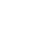

In [20]:
vetor = np.random.normal(size=(1, latent_dim))
img = composite_generator.predict(vetor)
image.array_to_img(img[0])

In [22]:
composite_gan.load_weights("composite_gan.h5")